In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('Train.csv')

In [8]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
df.shape

(8523, 12)

In [12]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [16]:
df['Outlet_Size']=df['Outlet_Size'].fillna('Unknown')

In [18]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [20]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# 1st Objective Analyzing top-selling products by both units sold and revenue

C:\Users\2024\AppData\Local\Temp\ipykernel_14836\1438311933.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='Item_Type',y='Item_Outlet_Sales' ,palette='Set1')


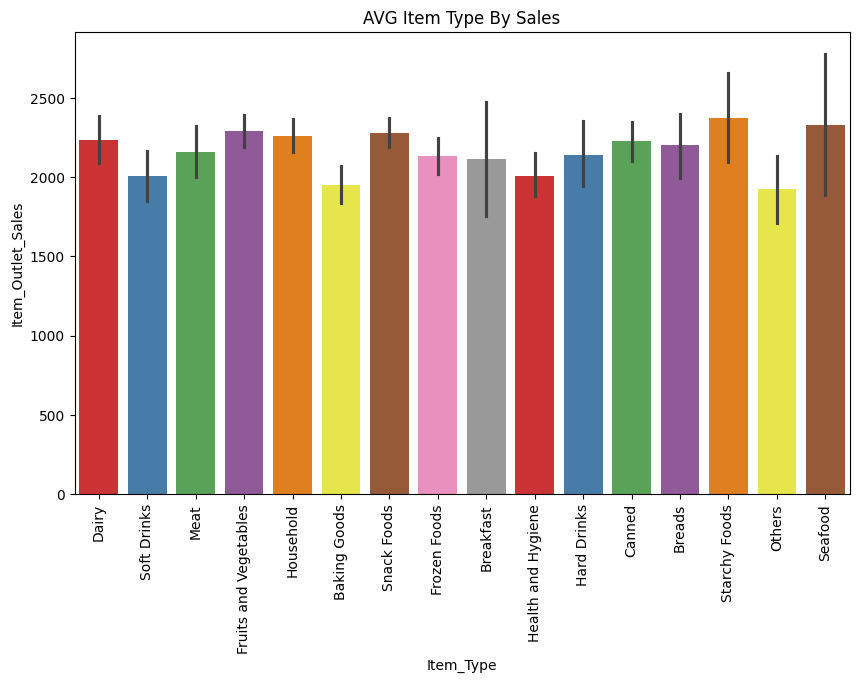

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x='Item_Type',y='Item_Outlet_Sales' ,palette='Set1')
plt.title('AVG Item Type By Sales')
plt.xticks(rotation=90)
plt.show()

In [25]:
most_sold=df.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)
most_sold.head(5)

Item_Type
Fruits and Vegetables    2.820060e+06
Snack Foods              2.732786e+06
Household                2.055494e+06
Frozen Foods             1.825735e+06
Dairy                    1.522594e+06
Name: Item_Outlet_Sales, dtype: float64

C:\Users\2024\AppData\Local\Temp\ipykernel_14836\160749007.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_sold.index, y=most_sold.values,palette='Set2')


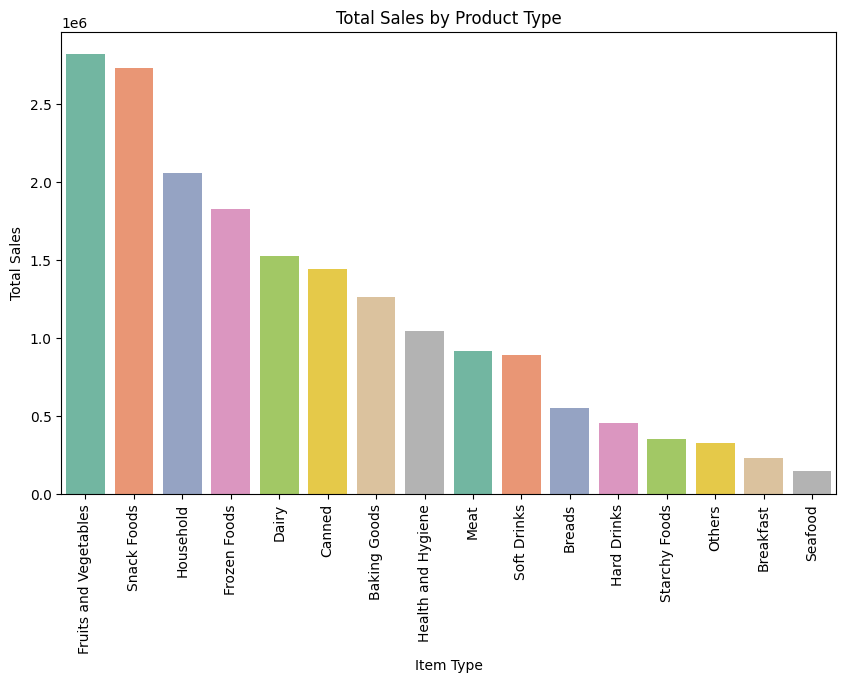

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x=most_sold.index, y=most_sold.values,palette='Set2')
plt.xticks(rotation=90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Type')
plt.show()

# 2nd Objective Highest Revenue Outlet and Why

In [30]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [32]:
most_outlet=df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending=False)
most_outlet.head()

Outlet_Identifier
OUT027    3.453926e+06
OUT035    2.268123e+06
OUT049    2.183970e+06
OUT017    2.167465e+06
OUT013    2.142664e+06
Name: Item_Outlet_Sales, dtype: float64

C:\Users\2024\AppData\Local\Temp\ipykernel_14836\1692782757.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_outlet.index, y=most_outlet.values,palette='Set1')


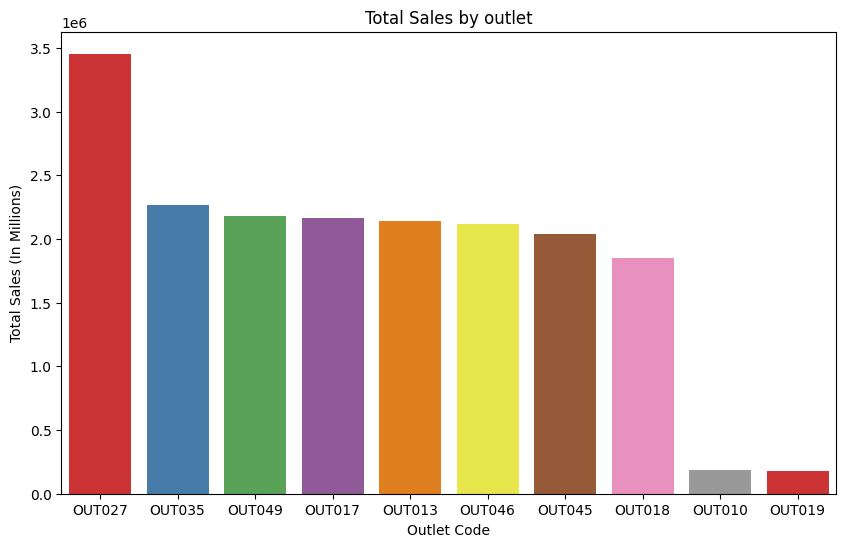

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(x=most_outlet.index, y=most_outlet.values,palette='Set1')
plt.xlabel('Outlet Code')
plt.ylabel('Total Sales (In Millions)')
plt.title('Total Sales by outlet')
plt.show()

In [36]:
df['outlet_years']=2009-df['Outlet_Establishment_Year']

In [38]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,outlet_years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,10
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,10
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800,11
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,22


In [40]:
most_xp=df.groupby(['Outlet_Identifier','outlet_years'])['Item_Outlet_Sales'].sum().reset_index()
most_xp.head()

,Outlet_Identifier,outlet_years,Item_Outlet_Sales
0,OUT010,11,1.883402e+05
1,OUT013,22,2.142664e+06
2,OUT017,2,2.167465e+06
3,OUT018,0,1.851823e+06
4,OUT019,24,1.796941e+05


In [42]:
most_xp= most_xp.sort_values(by='Item_Outlet_Sales', ascending=False)

In [44]:
most_xp.head()

,Outlet_Identifier,outlet_years,Item_Outlet_Sales
5,OUT027,24,3.453926e+06
6,OUT035,5,2.268123e+06
9,OUT049,10,2.183970e+06
2,OUT017,2,2.167465e+06
1,OUT013,22,2.142664e+06


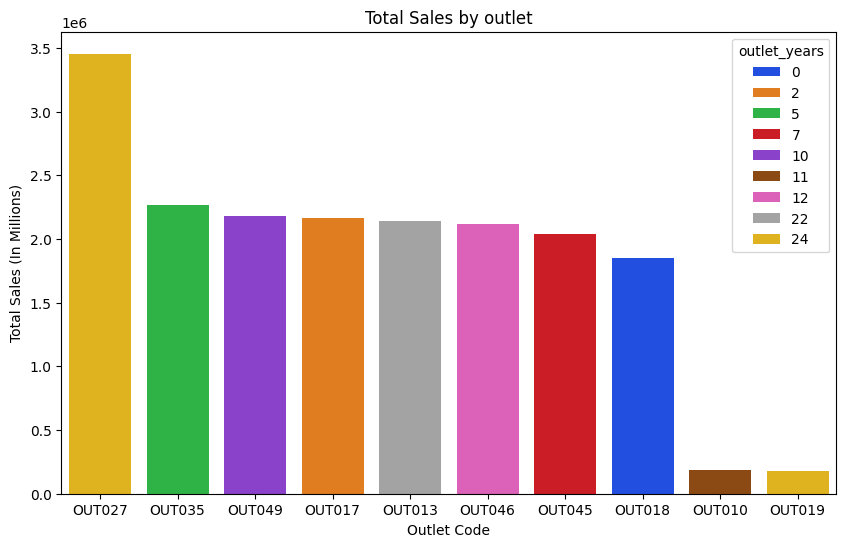

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(x=most_xp['Outlet_Identifier'], y=most_xp['Item_Outlet_Sales'], hue=most_xp['outlet_years'], palette='bright')
plt.xlabel('Outlet Code')
plt.ylabel('Total Sales (In Millions)')
plt.title('Total Sales by outlet')
plt.show()

# 3rd objective analyzing the item mrp with sales

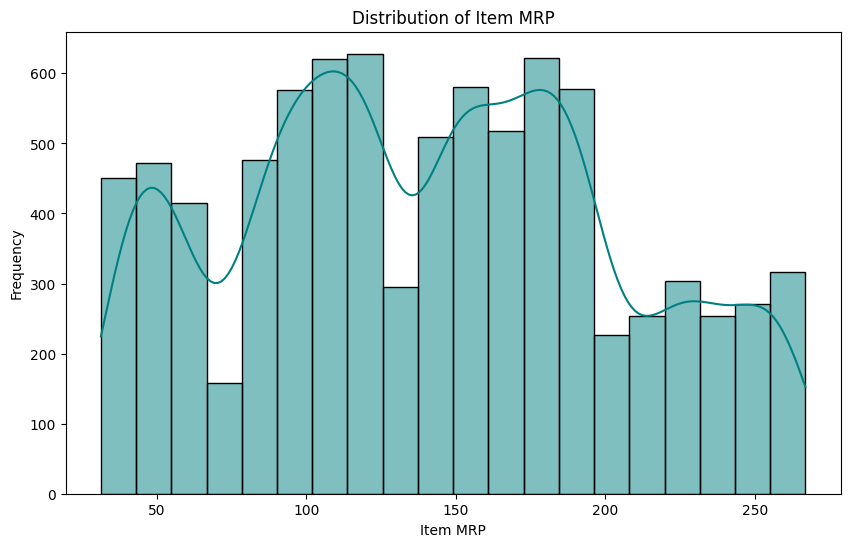

In [49]:
plt.figure(figsize=(10,6))
sns.histplot(df['Item_MRP'], bins=20, kde=True, color='Teal')
plt.title('Distribution of Item MRP')
plt.xlabel('Item MRP')
plt.ylabel('Frequency')
plt.show()

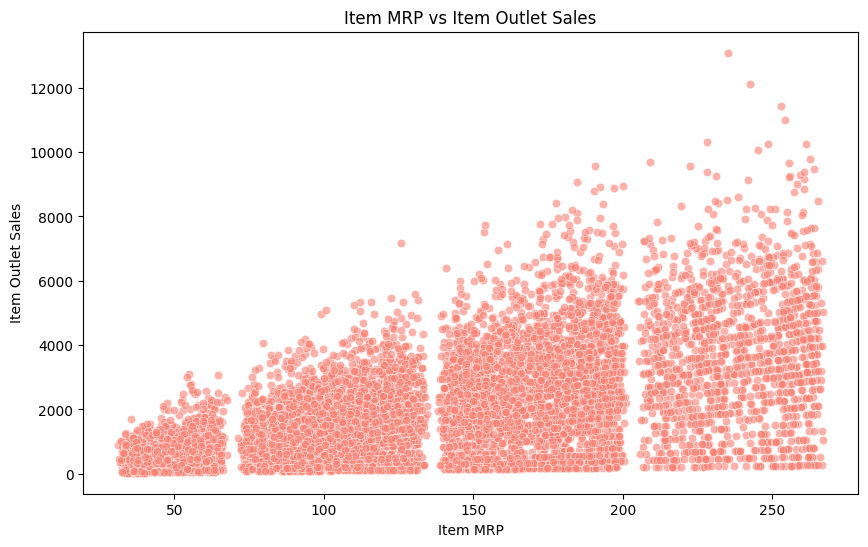

In [51]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Item_MRP'], y=df['Item_Outlet_Sales'], alpha=0.6,color='salmon')
plt.title('Item MRP vs Item Outlet Sales')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.show()

In [53]:
df['Price_Range'] = pd.cut(df['Item_MRP'], bins=[0, 50, 100, 150, 200, 300], labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

In [55]:
sales_range=df.groupby('Price_Range')['Item_Outlet_Sales'].sum()

C:\Users\2024\AppData\Local\Temp\ipykernel_14836\1115471646.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_range=df.groupby('Price_Range')['Item_Outlet_Sales'].sum()


C:\Users\2024\AppData\Local\Temp\ipykernel_14836\3411811447.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_range.index, y=sales_range.values, palette='Set2')


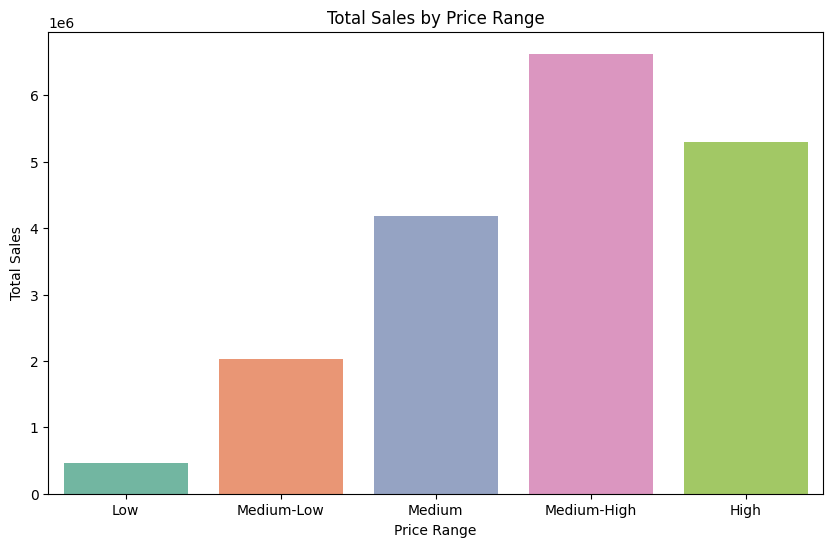

In [57]:
plt.figure(figsize=(10,6))
sns.barplot(x=sales_range.index, y=sales_range.values, palette='Set2')
plt.title('Total Sales by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Total Sales')
plt.show()

# 4th objective does the outlet size Matter or Not

In [60]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,outlet_years,Price_Range
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,10,High
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0,Low
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,10,Medium
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800,11,Medium-High
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,22,Medium-Low


In [62]:
out_size=df.groupby('Outlet_Size')['Item_Outlet_Sales'].sum().sort_values(ascending=False)
out_size.head()

Outlet_Size
Medium     7.489719e+06
Small      4.566212e+06
Unknown    4.392531e+06
High       2.142664e+06
Name: Item_Outlet_Sales, dtype: float64

In [64]:
out_size = out_size[out_size.index != 'Unknown']

In [66]:
out_size.head()

Outlet_Size
Medium    7.489719e+06
Small     4.566212e+06
High      2.142664e+06
Name: Item_Outlet_Sales, dtype: float64

C:\Users\2024\AppData\Local\Temp\ipykernel_14836\203975646.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=out_size.index,y=out_size.values,palette='dark')


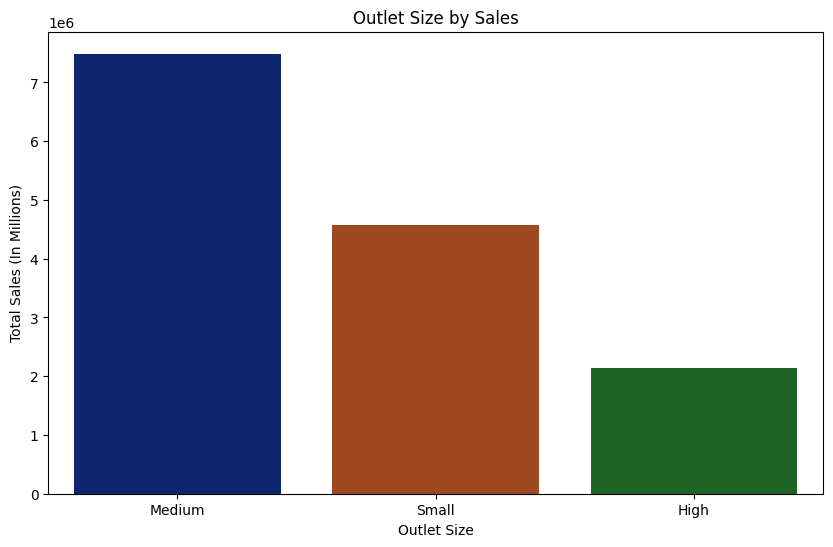

In [68]:
plt.figure(figsize=(10,6))
sns.barplot(x=out_size.index,y=out_size.values,palette='dark')
plt.title('Outlet Size by Sales')
plt.xlabel('Outlet Size')
plt.ylabel('Total Sales (In Millions)')
plt.show()